In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import pandas as pd

In [2]:
df = pd.read_csv('PAIDSEARCH-cleaned.txt', sep = ',')

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df.head()

,DATE_RAW_ID,DATE_ID,DATE,WEEKEND_SAT,WEEKEND_SUN,HALF_YEAR,WEEK_OF_YEAR,DAY_OF_YEAR,FISCAL_MONTH,FISCAL_HALF_YEAR,FISCAL_YEAR,FISCAL_QUARTER,FISCAL_WEEK,MONTH,YEAR,QUARTER,_MONTH,_YEAR,CAMPAIGN,CAMPAIGN_TYPE,DATA_STREAM_ATTRIBUTE_1,KEYWORD,MEDIA_TYPE,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,PAGE_VIEWS,TIME_ON_SITE_TOTAL,VISITOR_BOUNCE,VISITS
0,20170521,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,2017-01-01,21,141,2017-05-31,2017-01-01,2017-12-31,2017-02-01,2017-05-21,2017-05-31,2017-12-31,2017-02-01,2017-05-01T00:00:00.000Z,2017-01-01T00:00:00.000Z,Non Brand | Condition | Geo,Unbranded,CON,symptoms of asthma,PPC,May,Google,2.08,3.0,1.8,51.0,5.4,2.0,13.0,1.0,2.0
1,20170521,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,2017-01-01,21,141,2017-05-31,2017-01-01,2017-12-31,2017-02-01,2017-05-21,2017-05-31,2017-12-31,2017-02-01,2017-05-01T00:00:00.000Z,2017-01-01T00:00:00.000Z,Brand,Branded,CON,product1 spacer,PPC,May,Google,1.00,0.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN
2,20170521,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,2017-01-01,21,141,2017-05-31,2017-01-01,2017-12-31,2017-02-01,2017-05-21,2017-05-31,2017-12-31,2017-02-01,2017-05-01T00:00:00.000Z,2017-01-01T00:00:00.000Z,Non Brand | Treatment | National,Unbranded,CON,how to prevent asthma,PPC,May,Google,1.48,0.0,NaN,4.0,0.0,NaN,NaN,NaN,NaN
3,20170521,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,2017-01-01,21,141,2017-05-31,2017-01-01,2017-12-31,2017-02-01,2017-05-21,2017-05-31,2017-12-31,2017-02-01,2017-05-01T00:00:00.000Z,2017-01-01T00:00:00.000Z,Non Brand | Info | Geo,Unbranded,CON,facts about asthma,PPC,May,Bing,NaN,NaN,NaN,NaN,NaN,2.0,93.0,0.0,2.0
4,20170521,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,2017-01-01,21,141,2017-05-31,2017-01-01,2017-12-31,2017-02-01,2017-05-21,2017-05-31,2017-12-31,2017-02-01,2017-05-01T00:00:00.000Z,2017-01-01T00:00:00.000Z,Non Brand | Condition | Geo,Unbranded,CON,asthma symptoms in children,PPC,May,Bing,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.0


In [5]:
df.groupby('DATA_STREAM_ATTRIBUTE_1').count()

,DATE_RAW_ID,DATE_ID,DATE,WEEKEND_SAT,WEEKEND_SUN,HALF_YEAR,WEEK_OF_YEAR,DAY_OF_YEAR,FISCAL_MONTH,FISCAL_HALF_YEAR,FISCAL_YEAR,FISCAL_QUARTER,FISCAL_WEEK,MONTH,YEAR,QUARTER,_MONTH,_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MEDIA_TYPE,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,PAGE_VIEWS,TIME_ON_SITE_TOTAL,VISITOR_BOUNCE,VISITS
DATA_STREAM_ATTRIBUTE_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CON,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,488767,489140,489140,489140,482916,482918,95003,482918,482918,84543,84543,84543,84543


In [6]:
df.groupby('MEDIA_TYPE').count()

,DATE_RAW_ID,DATE_ID,DATE,WEEKEND_SAT,WEEKEND_SUN,HALF_YEAR,WEEK_OF_YEAR,DAY_OF_YEAR,FISCAL_MONTH,FISCAL_HALF_YEAR,FISCAL_YEAR,FISCAL_QUARTER,FISCAL_WEEK,MONTH,YEAR,QUARTER,_MONTH,_YEAR,CAMPAIGN,CAMPAIGN_TYPE,DATA_STREAM_ATTRIBUTE_1,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,PAGE_VIEWS,TIME_ON_SITE_TOTAL,VISITOR_BOUNCE,VISITS
MEDIA_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PPC,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,489140,488767,489140,489140,482916,482918,95003,482918,482918,84543,84543,84543,84543


In [7]:
df.shape

(489140, 34)

In [8]:
df = df.drop(['DATE_RAW_ID','HALF_YEAR','FISCAL_MONTH','FISCAL_HALF_YEAR','FISCAL_YEAR','FISCAL_QUARTER',
              'FISCAL_WEEK','MONTH','YEAR','QUARTER','_MONTH','_YEAR','DATA_STREAM_ATTRIBUTE_1','MEDIA_TYPE'], axis=1)

In [9]:
df.head(10)

,DATE_ID,DATE,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,PAGE_VIEWS,TIME_ON_SITE_TOTAL,VISITOR_BOUNCE,VISITS
0,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,symptoms of asthma,May,Google,2.08,3.0,1.80,51.0,5.40,2.0,13.0,1.0,2.0
1,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Brand,Branded,product1 spacer,May,Google,1.00,0.0,NaN,2.0,0.00,NaN,NaN,NaN,NaN
2,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | National,Unbranded,how to prevent asthma,May,Google,1.48,0.0,NaN,4.0,0.00,NaN,NaN,NaN,NaN
3,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Non Brand | Info | Geo,Unbranded,facts about asthma,May,Bing,NaN,NaN,NaN,NaN,NaN,2.0,93.0,0.0,2.0
4,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,asthma symptoms in children,May,Bing,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.0
5,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | Geo,Unbranded,how to reduce asthma symptoms,May,Google,2.00,0.0,NaN,1.0,0.00,NaN,NaN,NaN,NaN
6,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,breathing with asthma,May,Google,2.00,1.0,3.71,4.0,3.71,1.0,7.0,0.0,1.0
7,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Non Brand | Competitor | Geo,Unbranded,alternatives to competitor6,May,Google,4.00,0.0,NaN,1.0,0.00,NaN,NaN,NaN,NaN
8,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,best inhaler for asthma,May,Google,3.31,0.0,NaN,7.0,0.00,NaN,NaN,NaN,NaN
9,20170521,2017-05-21 00:00:00,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,asthmatic inhalers,May,Google,4.00,0.0,NaN,3.0,0.00,NaN,NaN,NaN,NaN


In [14]:
df.shape

(489140, 15)

In [11]:
df.groupby('CAMPAIGN').count()

,DATE_ID,DATE,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,PAGE_VIEWS,TIME_ON_SITE_TOTAL,VISITOR_BOUNCE,VISITS
CAMPAIGN,,,,,,,,,,,,,,,,,,,
About Asthma,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,2,2,2,2
About Asthma Paused 11/15 | National,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1
About Asthmaenglish,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,1,1,1
Asthma Airways,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,1,1,1
Asthma Airways Paused 11/15,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
product1 Exact,130,130,130,130,130,130,130,69,130,130,32,32,30,32,32,127,127,127,127
product1 Exact Mobile,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1
product1 Hcp Paused 10/15,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1


In [15]:
df.isnull().sum()

DATE_ID               0
WEEKEND_SAT           0
WEEKEND_SUN           0
WEEK_OF_YEAR          0
DAY_OF_YEAR           0
CAMPAIGN              0
CAMPAIGN_TYPE         0
KEYWORD             373
MONTH_OF_YEAR         0
NETWORK               0
_POSITION          6224
CLICKS             6222
CPC              394137
IMPRESSIONS        6222
MEDIA_COST         6222
dtype: int64

In [13]:
df = df.drop(['DATE','PAGE_VIEWS','TIME_ON_SITE_TOTAL','VISITOR_BOUNCE','VISITS'], axis=1)

In [22]:
df[(df['CPC'].isnull()) & (df['CLICKS'].isnull()) & (df['MEDIA_COST'].isnull())]

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST
3,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Info | Geo,Unbranded,facts about asthma,May,Bing,NaN,NaN,NaN,NaN,NaN
4,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,asthma symptoms in children,May,Bing,NaN,NaN,NaN,NaN,NaN
19,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | Geo,Unbranded,asthma relief,May,Bing,NaN,NaN,NaN,NaN,NaN
20,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,list of asthma medications,May,Bing,NaN,NaN,NaN,NaN,NaN
36,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,asthma symptoms in adults,May,Bing,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489044,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Competitor | Geo,Unbranded,competitor1 inhaler,January,Bing,NaN,NaN,NaN,NaN,NaN
489049,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Treatment,Unbranded,managing asthma,January,Bing,NaN,NaN,NaN,NaN,NaN
489095,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Product,Unbranded,inhalers for asthma,January,Bing,NaN,NaN,NaN,NaN,NaN
489112,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Treatment,Unbranded,asthma relief,January,Bing,NaN,NaN,NaN,NaN,NaN


In [24]:
df[(df['CPC'].isnull()) & (df['CLICKS']==0) & (df['MEDIA_COST']==0)]

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST
1,20170521,2017-05-27,2017-05-21,21,141,Brand,Branded,product1 spacer,May,Google,1.00,0.0,NaN,2.0,0.0
2,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | National,Unbranded,how to prevent asthma,May,Google,1.48,0.0,NaN,4.0,0.0
5,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | Geo,Unbranded,how to reduce asthma symptoms,May,Google,2.00,0.0,NaN,1.0,0.0
7,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Competitor | Geo,Unbranded,alternatives to competitor6,May,Google,4.00,0.0,NaN,1.0,0.0
8,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,best inhaler for asthma,May,Google,3.31,0.0,NaN,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489134,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Treatment | National,Unbranded,asthma action plan,January,Google,2.57,0.0,NaN,7.0,0.0
489135,20160101,2016-01-02,2016-01-03,1,1,Hispanic | Info | English Browser Paused 5/16,Unbranded,asma en los niños,January,Google,1.00,0.0,NaN,2.0,0.0
489136,20160101,2016-01-02,2016-01-03,1,1,Brand,Branded,product1 vs competitor1,January,Bing,1.00,0.0,NaN,4.0,0.0
489137,20160101,2016-01-02,2016-01-03,1,1,Hispanic | Info | English Browser Paused 5/16,Unbranded,qué es el asma,January,Google,1.00,0.0,NaN,8.0,0.0


In [25]:
df['CLICKS'].fillna(0, inplace=True)

In [26]:
df['MEDIA_COST'].fillna(0, inplace=True)

In [27]:
df['CPC'].fillna(0, inplace=True)

In [29]:
df[(df['IMPRESSIONS'].isnull()) & (df['CLICKS']==0)]

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST
3,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Info | Geo,Unbranded,facts about asthma,May,Bing,NaN,0.0,0.0,NaN,0.0
4,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,asthma symptoms in children,May,Bing,NaN,0.0,0.0,NaN,0.0
19,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | Geo,Unbranded,asthma relief,May,Bing,NaN,0.0,0.0,NaN,0.0
20,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,list of asthma medications,May,Bing,NaN,0.0,0.0,NaN,0.0
36,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,asthma symptoms in adults,May,Bing,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489044,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Competitor | Geo,Unbranded,competitor1 inhaler,January,Bing,NaN,0.0,0.0,NaN,0.0
489049,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Treatment,Unbranded,managing asthma,January,Bing,NaN,0.0,0.0,NaN,0.0
489095,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Product,Unbranded,inhalers for asthma,January,Bing,NaN,0.0,0.0,NaN,0.0
489112,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Treatment,Unbranded,asthma relief,January,Bing,NaN,0.0,0.0,NaN,0.0


In [30]:
df[(df['_POSITION'].isnull()) & (df['CLICKS']==0)]

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST
3,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Info | Geo,Unbranded,facts about asthma,May,Bing,NaN,0.0,0.0,NaN,0.0
4,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,asthma symptoms in children,May,Bing,NaN,0.0,0.0,NaN,0.0
19,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | Geo,Unbranded,asthma relief,May,Bing,NaN,0.0,0.0,NaN,0.0
20,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,list of asthma medications,May,Bing,NaN,0.0,0.0,NaN,0.0
36,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,asthma symptoms in adults,May,Bing,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489044,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Competitor | Geo,Unbranded,competitor1 inhaler,January,Bing,NaN,0.0,0.0,NaN,0.0
489049,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Treatment,Unbranded,managing asthma,January,Bing,NaN,0.0,0.0,NaN,0.0
489095,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Product,Unbranded,inhalers for asthma,January,Bing,NaN,0.0,0.0,NaN,0.0
489112,20160101,2016-01-02,2016-01-03,1,1,Non Brand | Treatment,Unbranded,asthma relief,January,Bing,NaN,0.0,0.0,NaN,0.0


In [31]:
df['IMPRESSIONS'].fillna(0, inplace=True)

In [32]:
df[(df['_POSITION'].isnull()) & (df['CLICKS']!=0)]

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST
81896,20170314,2017-03-18,2017-03-19,11,73,Non Brand | Info | National,Unbranded,what is chronic asthma,March,Bing,NaN,1.0,4.85,0.0,4.85
246044,20160913,2016-09-17,2016-09-18,38,257,Brand,Branded,product1 80 inhaler,September,Bing,NaN,1.0,1.01,0.0,1.01


In [33]:
df['_POSITION'].fillna(0, inplace=True)

In [34]:
df.isnull().sum()

DATE_ID            0
WEEKEND_SAT        0
WEEKEND_SUN        0
WEEK_OF_YEAR       0
DAY_OF_YEAR        0
CAMPAIGN           0
CAMPAIGN_TYPE      0
KEYWORD          373
MONTH_OF_YEAR      0
NETWORK            0
_POSITION          0
CLICKS             0
CPC                0
IMPRESSIONS        0
MEDIA_COST         0
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.head(10)

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST
0,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,symptoms of asthma,May,Google,2.08,3.0,1.80,51.0,5.40
1,20170521,2017-05-27,2017-05-21,21,141,Brand,Branded,product1 spacer,May,Google,1.00,0.0,0.00,2.0,0.00
2,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | National,Unbranded,how to prevent asthma,May,Google,1.48,0.0,0.00,4.0,0.00
3,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Info | Geo,Unbranded,facts about asthma,May,Bing,0.00,0.0,0.00,0.0,0.00
4,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,asthma symptoms in children,May,Bing,0.00,0.0,0.00,0.0,0.00
5,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | Geo,Unbranded,how to reduce asthma symptoms,May,Google,2.00,0.0,0.00,1.0,0.00
6,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,breathing with asthma,May,Google,2.00,1.0,3.71,4.0,3.71
7,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Competitor | Geo,Unbranded,alternatives to competitor6,May,Google,4.00,0.0,0.00,1.0,0.00
8,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,best inhaler for asthma,May,Google,3.31,0.0,0.00,7.0,0.00
9,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,asthmatic inhalers,May,Google,4.00,0.0,0.00,3.0,0.00


In [37]:
df.shape

(488767, 15)

In [38]:
df['CTR'] = df['CLICKS']/df['IMPRESSIONS']

In [39]:
df['CTR'].isnull().sum()

5849

In [40]:
df['CTR'].fillna(0, inplace=True)

In [41]:
df.loc[df['CTR']>0,'Flag'] = 1

In [42]:
df.loc[df['CTR']<=0,'Flag'] = 0

In [43]:
df['Flag'].isnull().sum()

0

In [44]:
df.to_csv('V1.csv',index_label=False)

### Feature Selection

In [45]:
df0 = pd.read_csv('V1.csv')

In [46]:
df0.shape

(488767, 17)

In [47]:
pd.set_option('display.max_colwidth', 100)

In [48]:
df0.head(10)

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,CTR,Flag
0,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,symptoms of asthma,May,Google,2.08,3.0,1.80,51.0,5.40,0.058824,1.0
1,20170521,2017-05-27,2017-05-21,21,141,Brand,Branded,product1 spacer,May,Google,1.00,0.0,0.00,2.0,0.00,0.000000,0.0
2,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | National,Unbranded,how to prevent asthma,May,Google,1.48,0.0,0.00,4.0,0.00,0.000000,0.0
3,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Info | Geo,Unbranded,facts about asthma,May,Bing,0.00,0.0,0.00,0.0,0.00,0.000000,0.0
4,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,asthma symptoms in children,May,Bing,0.00,0.0,0.00,0.0,0.00,0.000000,0.0
5,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Treatment | Geo,Unbranded,how to reduce asthma symptoms,May,Google,2.00,0.0,0.00,1.0,0.00,0.000000,0.0
6,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Condition | Geo,Unbranded,breathing with asthma,May,Google,2.00,1.0,3.71,4.0,3.71,0.250000,1.0
7,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Competitor | Geo,Unbranded,alternatives to competitor6,May,Google,4.00,0.0,0.00,1.0,0.00,0.000000,0.0
8,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,best inhaler for asthma,May,Google,3.31,0.0,0.00,7.0,0.00,0.000000,0.0
9,20170521,2017-05-27,2017-05-21,21,141,Non Brand | Product | Geo,Unbranded,asthmatic inhalers,May,Google,4.00,0.0,0.00,3.0,0.00,0.000000,0.0


In [49]:
df0.groupby('CAMPAIGN').count()

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,CTR,Flag
CAMPAIGN,,,,,,,,,,,,,,,,
About Asthma,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
About Asthma Paused 11/15 | National,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Asthma Airways Paused 11/15,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Asthma Inhaler,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Asthma Symptoms,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
product1 Exact,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
product1 Exact Mobile,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
product1 Hcp Paused 10/15,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [50]:
df0.columns

Index(['DATE_ID', 'WEEKEND_SAT', 'WEEKEND_SUN', 'WEEK_OF_YEAR', 'DAY_OF_YEAR',
       'CAMPAIGN', 'CAMPAIGN_TYPE', 'KEYWORD', 'MONTH_OF_YEAR', 'NETWORK',
       '_POSITION', 'CLICKS', 'CPC', 'IMPRESSIONS', 'MEDIA_COST', 'CTR',
       'Flag'],
      dtype='object')

In [51]:
df0.groupby('CAMPAIGN_TYPE').count()

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,KEYWORD,MONTH_OF_YEAR,NETWORK,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,CTR,Flag
CAMPAIGN_TYPE,,,,,,,,,,,,,,,,
Branded,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493,100493
Unbranded,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274,388274


In [52]:
df0.groupby('NETWORK').count()

,DATE_ID,WEEKEND_SAT,WEEKEND_SUN,WEEK_OF_YEAR,DAY_OF_YEAR,CAMPAIGN,CAMPAIGN_TYPE,KEYWORD,MONTH_OF_YEAR,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,CTR,Flag
NETWORK,,,,,,,,,,,,,,,,
Bing,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312,177312
Google,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740,308740
Yahoo,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715


In [54]:
df_new = df0.drop(['DATE_ID','WEEKEND_SAT','WEEKEND_SUN','WEEK_OF_YEAR','DAY_OF_YEAR','CAMPAIGN',
                   'CAMPAIGN_TYPE','KEYWORD','MONTH_OF_YEAR','NETWORK','CTR','Flag'], axis=1)

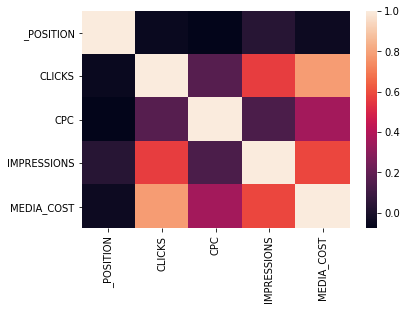

In [55]:
sb.heatmap(df_new.corr())

In [56]:
scaler = StandardScaler()
X = df_new.values
X_new = scaler.fit_transform(X)

In [57]:
pca = PCA(n_components=0.95)
pca.fit(X_new)
m = pca.transform(X_new)

In [58]:
pca.explained_variance_ratio_

array([0.48084295, 0.20939696, 0.17716607, 0.09502008])

In [59]:
import numpy as np
most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]

In [60]:
feature_names = df_new.columns

In [61]:
most_important_names = [feature_names[most_important[i]] for i in range(pca.components_.shape[0])]

In [62]:
most_important_names

['MEDIA_COST', '_POSITION', 'CPC', 'IMPRESSIONS']

In [63]:
xvector = pca.components_[0]
yvector = pca.components_[1]

In [64]:
xs = m[:,0]
ys = m[:,1]

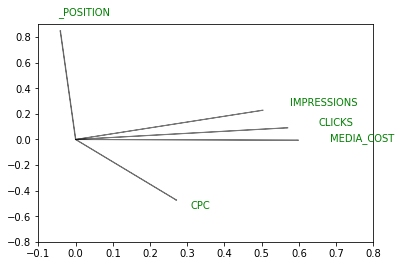

In [65]:
import matplotlib.pyplot as plt 

for i in range(len(xvector)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='k', alpha=0.5)
    plt.text(xvector[i]*1.15, yvector[i]*1.15, feature_names[i], color='g')

plt.xlim(-0.1,0.8)
plt.ylim(-0.8,0.9)

plt.show()